# Закономерности определяющие успешность игры.

В нашем распоряжении исторические данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нужно выявить закономерности, определяющие успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Задача состоит в планировании кампании на 2017-й год, основываясь на данных за 2016 год.

## Изучим данные

Для начала изучим датасет. Проверим пропущенные значения, избавимся от дубликатов и аномальных значений.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats as st

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
pd.set_option('display.max_columns', 50) 

In [3]:
# Выведем "шапку" таблицы
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# Посмотрим информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Проверим количество пропусков в столбцах
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
# Проверим сразу несколько столбцов на аномальные значения
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
# Далее пройдемся по значениям некоторых столбцов
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [8]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [9]:
user_score_sorted = df.sort_values(by='User_Score')
user_score_sorted['User_Score'].unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

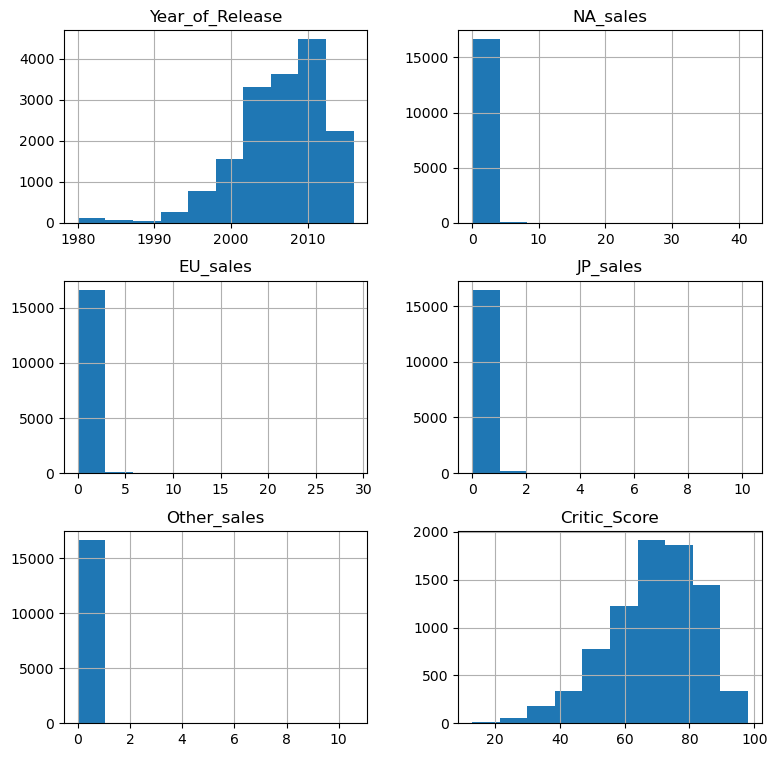

In [10]:
# Создадим графики для каждого столбца, и посмотрим на распределение данных
df.hist(figsize=(9, 9))
None

In [11]:
# Проверим количество явных дубликатов
df.duplicated().sum()

0

**Вывод:** Изучив данные, можно сказать следующее:
 - в столбцах с  оценкой критиков, оценкой пользователей и "рейтинг" наблюдается большое количество пропусков
 - столбец "Year_of_Release" необходимо перевести в тип int
 - столбец "User_Score" необходимо перевести в тип float, так же в данном столбце замечено значение "TBD" 
 - столбец с оценкой критиков приведем к типу int
 - аномальных значений не обнаружено
 - распределение данных нормальное

## Подготовка данных

В данном блоке мы подготовим данные к дальнейшей работе с ними. Приведем столбцы к верному типу, избавимся от пропусков, добавим необходимые столбцы.

In [12]:
# Приведем все названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Разберемся со значением "TBD" в столбце "User_Score". По первой же ссылке в интернете получаем информацию, что "TBD" это аббревиатура от "To Be Determined", что переводится как "будет определено". Следовательно мы говорим либо о новых тайтлах, за которые еще никто не успел проголосовать, либо о малоизвестных играх. Данное значение необходимо заменить пропуском NaN.

In [13]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'].isna().sum()

9125

Год выпуска необходимо привести к типу с целочисленными данными (тут даже объяснять нет смысла). Оценка пользователей изначально представлена типом object, нам же для дальнейшей работы потребуется Float, так как это оценка от 0 до 10.0. Оценка критиков представлена интервалом 0 - 100, можно убрать все значения после запятой.

In [14]:
# Приведем данные к нужным типам
df['year_of_release'] = df['year_of_release'].astype('Int32')
df['user_score'] = df['user_score'].astype('float32')
df['critic_score'] = df['critic_score'].astype('Int32')

Для замены пропусков в столбцах "critic_score" и "user_score" использую значение -1. Данная замена позволит неверных результатов, так как пропусков очень много.

In [15]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)

Теперь добавим новый столбец с суммарными продажами для каждой игры.

In [16]:
df['sales_total'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  Int32  
 9   user_score       16715 non-null  float32
 10  rating           9949 non-null   object 
 11  sales_total      16715 non-null  float64
dtypes: Int32(2), float32(1), float64(5), object(4)
memory usage: 1.4+ MB


In [17]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6766
sales_total           0
dtype: int64

**Вывод:** в данном блоке была проведена предобработка данных. Добавлен столбец с суммарными продажами, изменены типы данных, пропуски заменены заглушками в столбцах с оценками пользователей и критиков. В столбце с именем и жанром есть по 2 пропуска, на эти данные можно не обращать внимания. В столбце с годом выпуска игры 269 пропусков, из общей выборки это лишь 1,6%. В данных о рейтинге осталось много пропусков, в данный момент я считаю целесообразным оставить их без изменений.

## Исследовательский анализ данных

### Выведем данные о том, сколько игр выпускалось в разные годы.

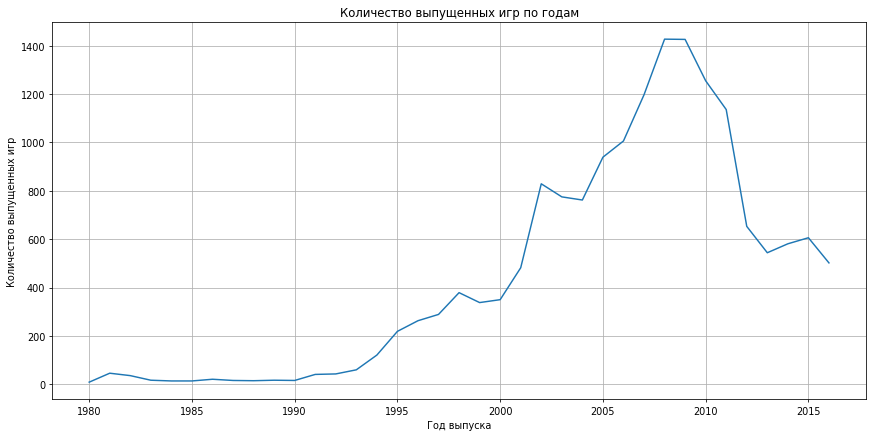

In [18]:
games_by_years = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
figure(figsize=(15, 7), dpi=70)
plt.plot(games_by_years)
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')
plt.grid(True)
None

По данному графику видно, что до 1993-1995 года выпускалось очень мало игр, в нулевых заметен резкий скачок, а к 2008-2009 был достигнут пик выпускаемой "продукции". Эти данные можно объяснить стремительным развитием как компьютеров, так и появлением новых игроков на поле консолей. Падение с 2009 года можно объяснить появлением смартфонов в привычном для нас понимании (первый айфон был представлен в 2007), а также падающим интересом и перенасыщением рынка.

### Посмотрим как менялись продажи по платформам. 
Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [19]:
platform_sales = pd.pivot_table(df, values="sales_total", index="platform", columns="year_of_release", aggfunc=np.sum)

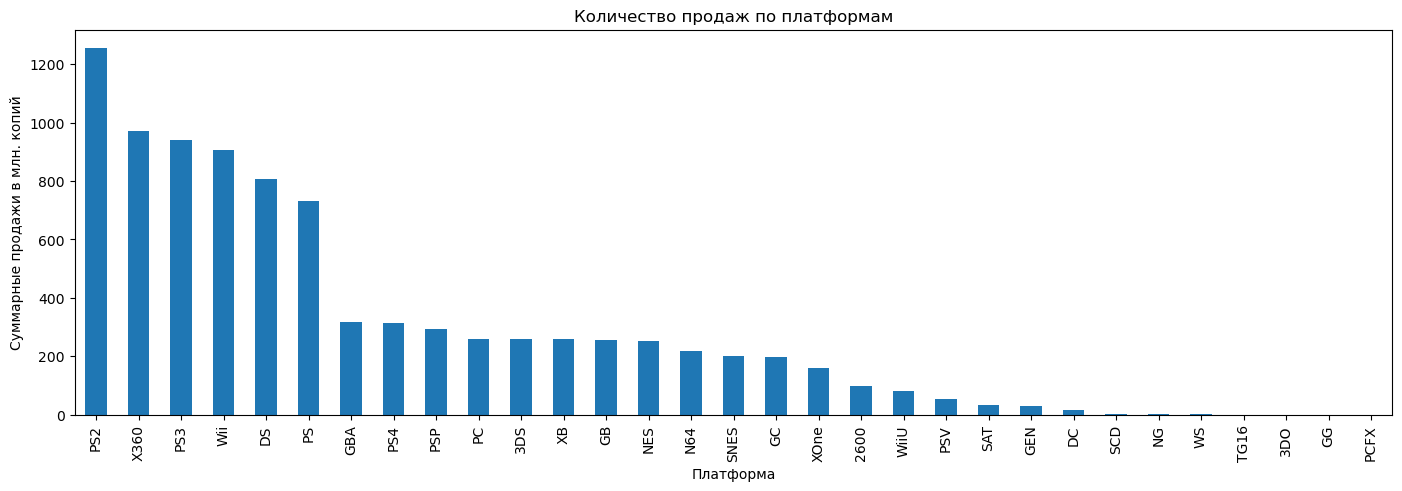

In [20]:
df.groupby('platform')['sales_total'].sum().sort_values(ascending = False).plot(kind = 'bar', figsize = (17,5))
plt.title('Количество продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи в млн. копий')
None

Из графика видно, что самые популярные игровые платформы (переступившие порог в 500 млн. проданных копий) за рассматриваемый период это PlayStation 2, Xbox360, PlayStation 3, Wii, Nintendo DS и PlayStation.

### Изучим распределение продаж по годам для Playstation, 
ведь мы можем наглядно пройти весь путь от первой до третьей итерации платформы.

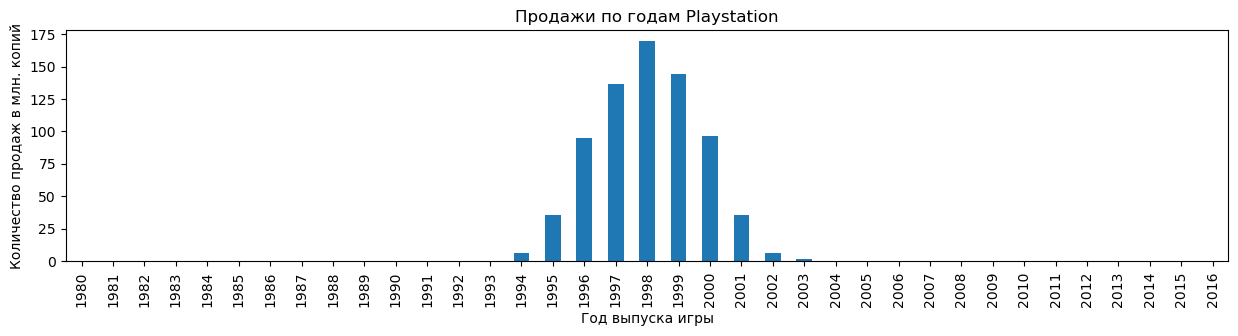

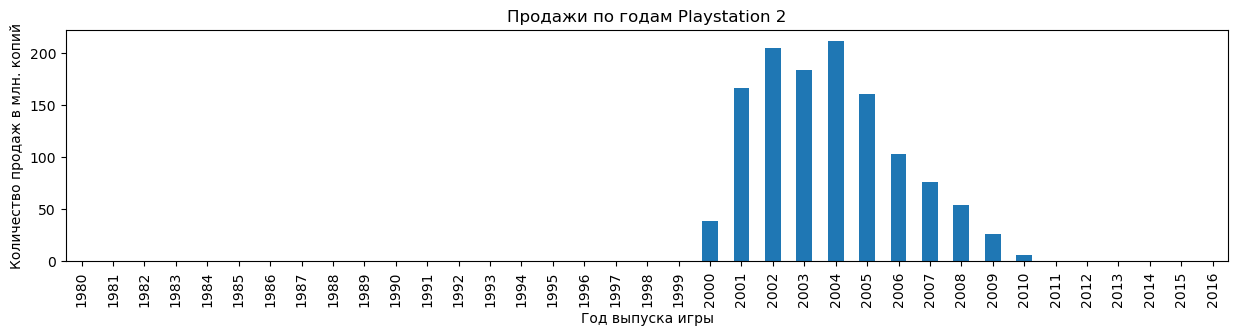

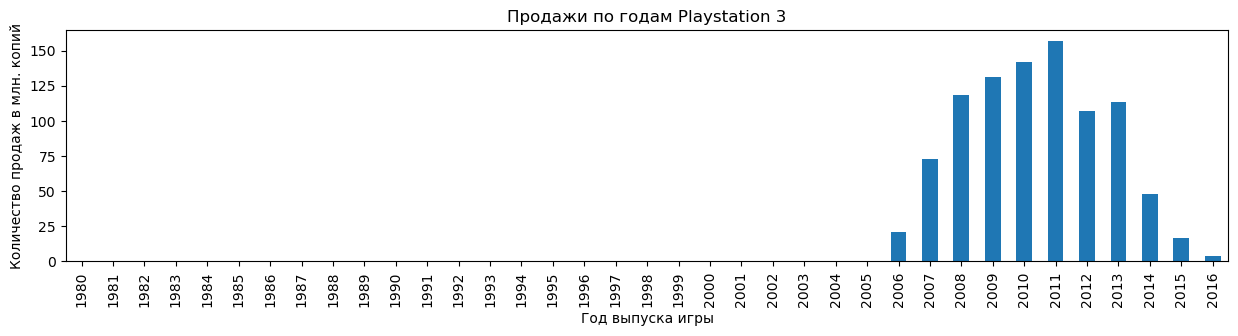

In [21]:
platform_sales.loc['PS'].plot(kind = 'bar', figsize = (15,3), xlabel = 'Год выпуска игры', ylabel = 'Количество продаж в млн. копий', title = 'Продажи по годам Playstation')
plt.show()
platform_sales.loc['PS2'].plot(kind = 'bar', figsize = (15,3), xlabel = 'Год выпуска игры', ylabel = 'Количество продаж в млн. копий', title = 'Продажи по годам Playstation 2')
plt.show()
platform_sales.loc['PS3'].plot(kind = 'bar', figsize = (15,3), xlabel = 'Год выпуска игры', ylabel = 'Количество продаж в млн. копий', title = 'Продажи по годам Playstation 3')
plt.show()

Для перехода с первой версии плейстейшн на вторую потребовалось 2 года, а с второй на третью уже 4 года.

### Посмотрим сколько лет продавались игры на каждую из платформ.

In [22]:
platform_count = pd.pivot_table(df, values="sales_total", index="year_of_release", columns="platform", aggfunc=np.count_nonzero)
a = platform_count.count()
display(a)
display(a.describe())

platform
2600    10
3DO      2
3DS      6
DC       7
DS      11
GB      13
GBA      8
GC       7
GEN      5
GG       1
N64      7
NES     12
NG       4
PC      26
PCFX     1
PS      10
PS2     12
PS3     11
PS4      4
PSP     12
PSV      6
SAT      6
SCD      2
SNES    10
TG16     1
WS       3
Wii     11
WiiU     5
X360    12
XB       9
XOne     4
dtype: int64

count    31.000000
mean      7.677419
std       5.081910
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
dtype: float64

В среднем срок "жизни" приставки составляет 7-8 лет. Самый "долгожитель" это ПК - 26 лет к ряду выходят игры.

### Определим актуальный период и выберем платформы, которые лидируют по продажам, растут или падают. 
Также выберем несколько потенциально прибыльных платформ.

Из полученных ранее данных можно выделить рост выпускаемых игр с 1994 года по 2008, и падение с 2009 по 2016. За актуальный период возьмем промежуток с 2015 года по н.в. (последние 2 года)

In [23]:
actuall_period = df[df['year_of_release'] >= 2015]

Теперь в новом периоде выберем топ лидеров по продажам, отсеем платформы которые уже не актуальны, и определим потенциально прибыльные платформы.

In [24]:
platform_sales_2 = pd.pivot_table(actuall_period, values="sales_total", index="year_of_release", columns="platform", aggfunc=np.sum)
platform_sales_2

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Приставку PSP можно сразу отсеять, так как она уже не актуальна. Также можно отсеять Wii, за 2016 год продажи минимальны, это объясняется новым поколением WiiU.

In [25]:
del platform_sales_2['PSP']
del platform_sales_2['Wii']
platform_sales_2

platform,3DS,PC,PS3,PS4,PSV,WiiU,X360,XOne
year_of_release,,,,,,,,
2015,27.78,8.52,16.82,118.90,6.25,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,4.25,4.60,1.52,26.15


Самыми перспективными платформами являются PS4 и XOne так как они вышли не так давно, и показывают отличные показатели продаж за последние годы. Тройку замыкает приставка 3DS.

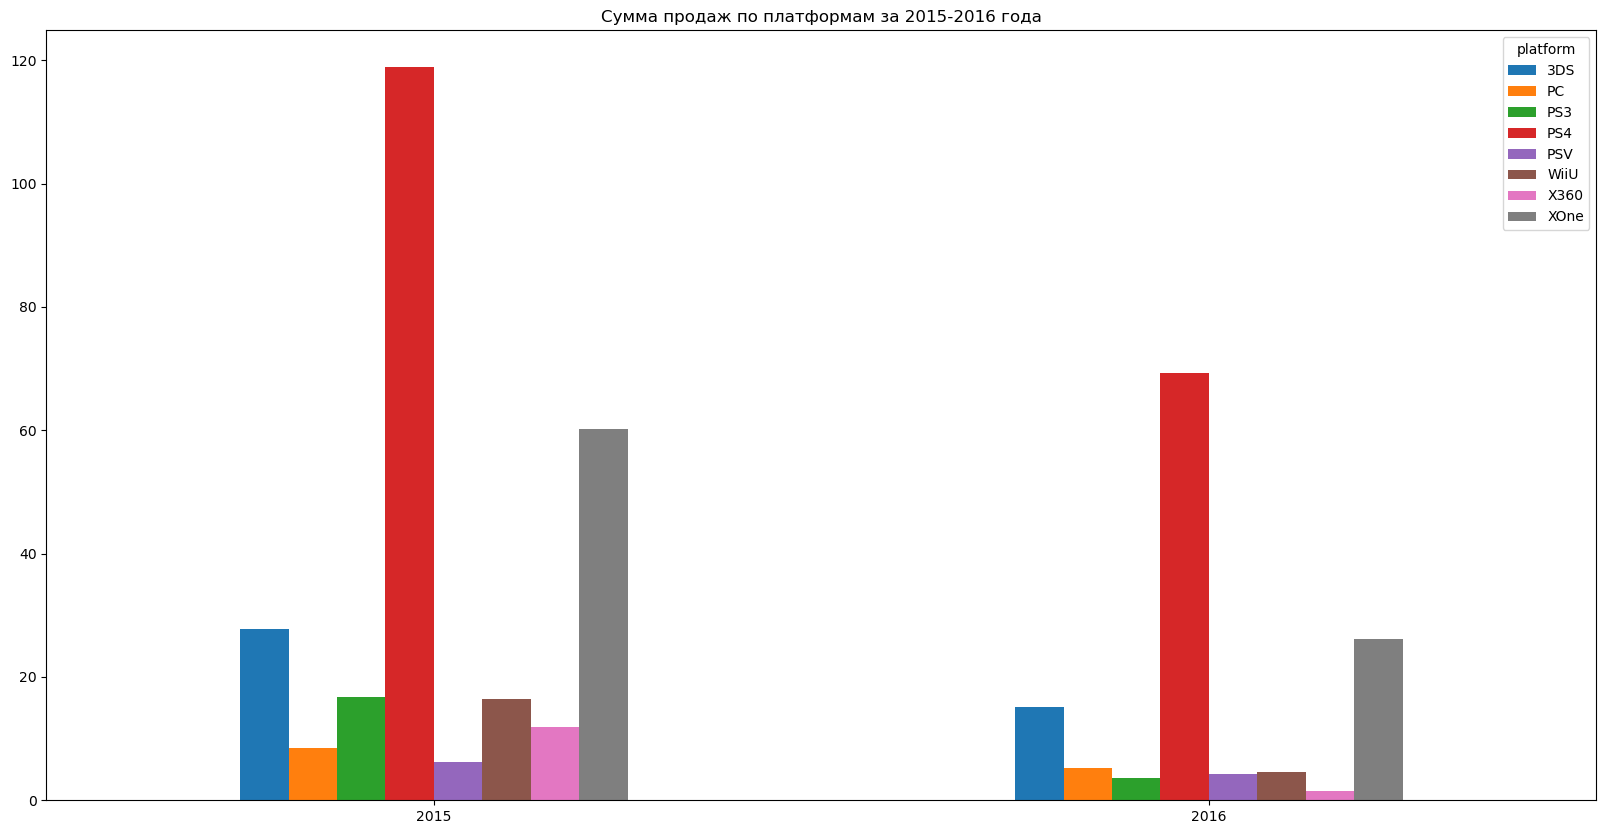

In [26]:
platform_sales_2.plot(kind = 'bar', figsize = (20, 10), title = 'Сумма продаж по платформам за 2015-2016 года', xlabel='', rot=360)
None

In [27]:
platform_sales_2.sum().sort_values(ascending=False)

platform
PS4     188.15
XOne     86.29
3DS      42.92
WiiU     20.95
PS3      20.42
PC       13.77
X360     13.48
PSV      10.50
dtype: float64

В тоже время лучшие платформы по продажам за последние 8 лет являются Ps3 и X360.

Основываясь на всех полученных данных, можно сказать, что самые перспективные платформы это PS4, XOne и 3DS.

### Построим диаграмму размаха по глобальным продажам игр в разбивке по платформам за последние 2 года.

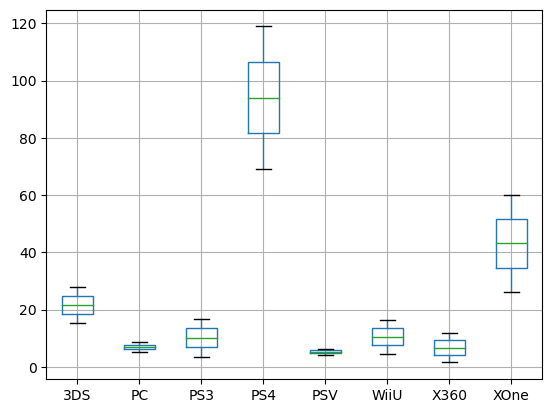

In [28]:
platform_sales_2.boxplot()
None

Выводы по диаграмме размаха:
 - пика продаж в год достигла платформа PS4
 - в целом, медиана у всех платформ ведет себя похоже

Данной диаграмой мы доказали то, что уже было описано в проекте выше. Самые большие продажи показали игры для платформ PS4 и XOne. PSV и PC занимают очень маленькую часть рынка.

### Ответим на вопрос: как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами для 3 самых продаваемых платформ и 3 самых перспективных.

Сначала по оценкам пользователей, следом по оценкам критиков.

Корреляция составляет: 0.39543454945454876


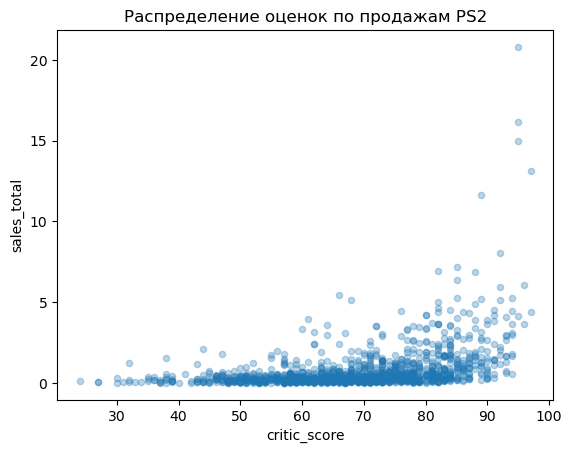

In [29]:
corr_ps2 = df[(df['platform'] == 'PS2') & (df['critic_score'] > 0)]
corr_ps2.plot(x='critic_score', y='sales_total', kind='scatter', alpha=0.3, title='Распределение оценок по продажам PS2') 
print(f'Корреляция составляет:', corr_ps2['critic_score'].astype('float').corr(corr_ps2['sales_total']))

Корреляция составляет: 0.39373586530725835


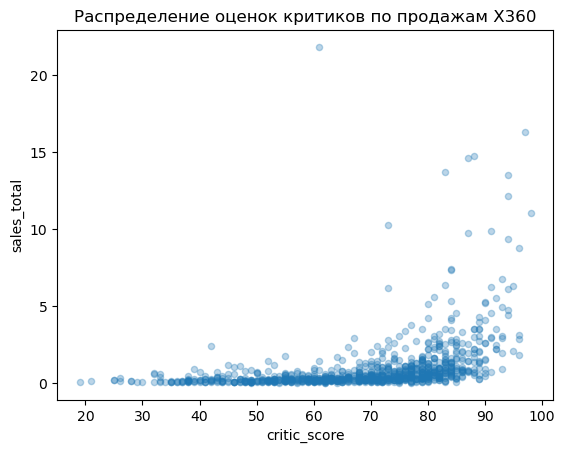

In [30]:
corr_x360 = df[(df['platform'] == 'X360') & (df['critic_score'] > 0)]
corr_x360.plot(x='critic_score', y='sales_total', kind='scatter', alpha=0.3, title='Распределение оценок критиков по продажам X360') 
print(f'Корреляция составляет:', corr_x360['critic_score'].astype('float').corr(corr_x360['sales_total']))

Корреляция составляет: 0.4324315685642063


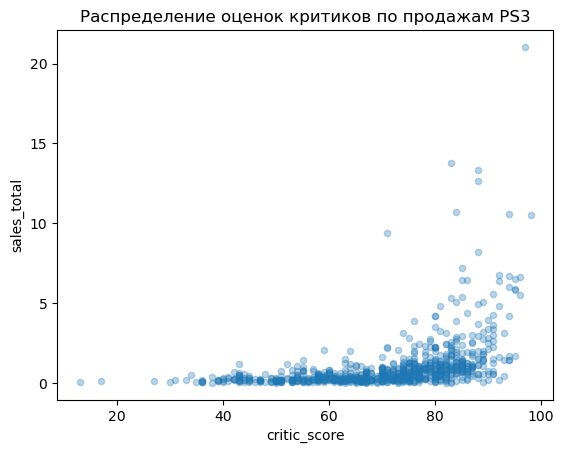

In [31]:
corr_ps3 = df[(df['platform'] == 'PS3') & (df['critic_score'] > 0)]
corr_ps3.plot(x='critic_score', y='sales_total', kind='scatter', alpha=0.3, title='Распределение оценок критиков по продажам PS3') 
print(f'Корреляция составляет:', corr_ps3['critic_score'].astype('float').corr(corr_ps3['sales_total']))

Корреляция составляет: 0.40656790206178095


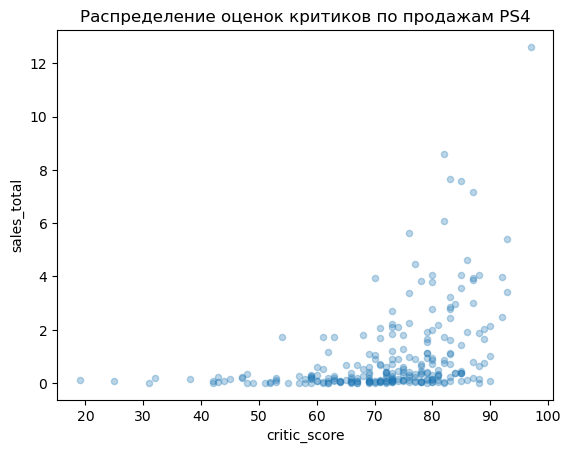

In [32]:
corr_ps4 = df[(df['platform'] == 'PS4') & (df['critic_score'] > 0)]
corr_ps4.plot(x='critic_score', y='sales_total', kind='scatter', alpha=0.3, title='Распределение оценок критиков по продажам PS4') 
print(f'Корреляция составляет:', corr_ps4['critic_score'].astype('float').corr(corr_ps4['sales_total']))

Корреляция составляет: 0.4169983280084017


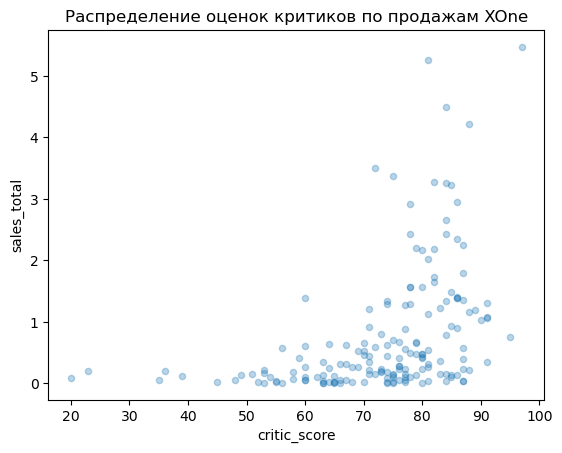

In [33]:
corr_xone = df[(df['platform'] == 'XOne') & (df['critic_score'] > 0)]
corr_xone.plot(x='critic_score', y='sales_total', kind='scatter', alpha=0.3, title='Распределение оценок критиков по продажам XOne') 
print(f'Корреляция составляет:', corr_xone['critic_score'].astype('float').corr(corr_xone['sales_total']))

Корреляция составляет: 0.3494009303924131


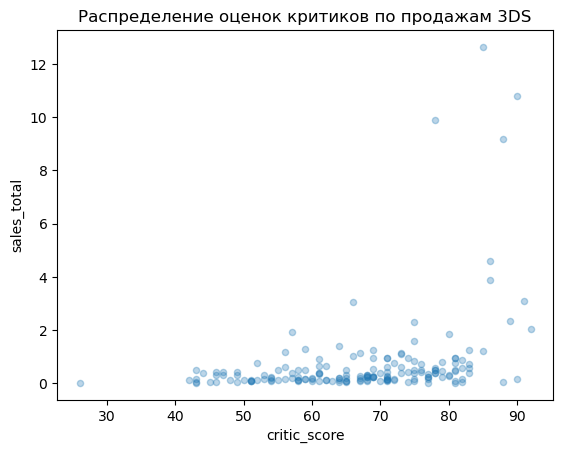

In [34]:
corr_3ds = df[(df['platform'] == '3DS') & (df['critic_score'] > 0)]
corr_3ds.plot(x='critic_score', y='sales_total', kind='scatter', alpha=0.3, title='Распределение оценок критиков по продажам 3DS') 
print(f'Корреляция составляет:', corr_3ds['critic_score'].astype('float').corr(corr_3ds['sales_total']))

**Средняя корреляция колеблется в районе 0.4, это показывает наличие зависимости (хоть и не сильной) рейтинга критиков от объема продаж.**

**Теперь посмотрим на те же платформы, но с оценками пользователей.**

Корреляция составляет: 0.17286550177990245


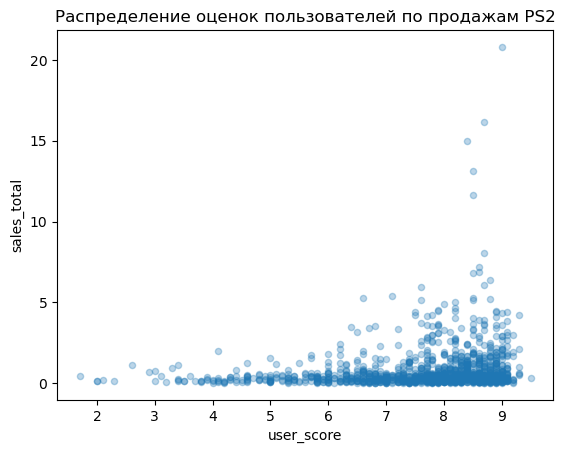

In [35]:
corr_ps2_user_score = df[(df['platform'] == 'PS2') & (df['user_score'] > 0)]
corr_ps2_user_score.plot(x='user_score', y='sales_total', kind='scatter', alpha=0.3, title='Распределение оценок пользователей по продажам PS2') 
print(f'Корреляция составляет:', corr_ps2_user_score['user_score'].corr(corr_ps2_user_score['sales_total']))

Корреляция составляет: 0.11445883533297777


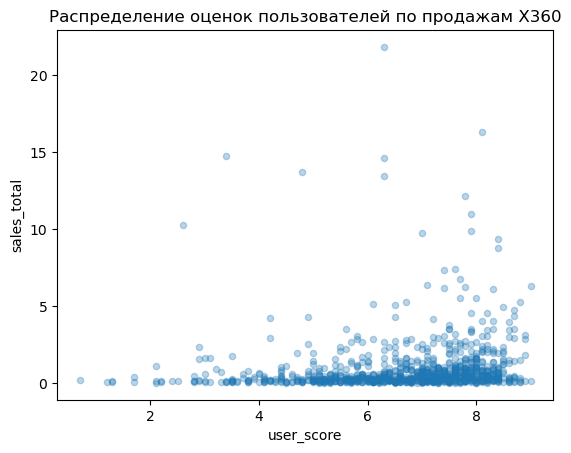

In [36]:
corr_x360_user_score = df[(df['platform'] == 'X360') & (df['user_score'] > 0)]
corr_x360_user_score.plot(x='user_score', y='sales_total', kind='scatter', alpha=0.3, title='Распределение оценок пользователей по продажам X360') 
print(f'Корреляция составляет:', corr_x360_user_score['user_score'].corr(corr_x360_user_score['sales_total']))

Корреляция составляет: 0.12669134312091046


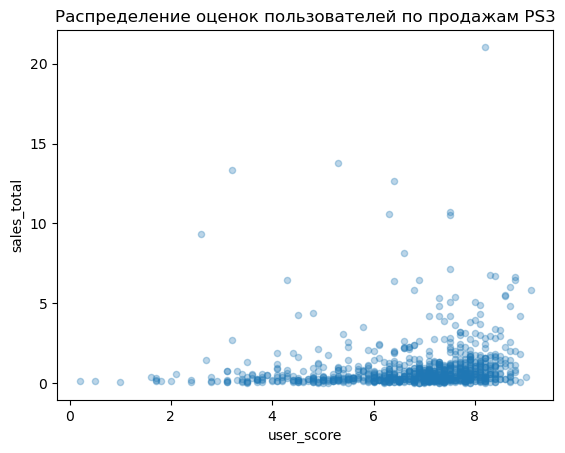

In [37]:
corr_ps3_user_score = df[(df['platform'] == 'PS3') & (df['user_score'] > 0)]
corr_ps3_user_score.plot(x='user_score', y='sales_total', kind='scatter', alpha=0.3, title='Распределение оценок пользователей по продажам PS3') 
print(f'Корреляция составляет:', corr_ps3_user_score['user_score'].corr(corr_ps3_user_score['sales_total']))

Корреляция составляет: -0.031957109005188264


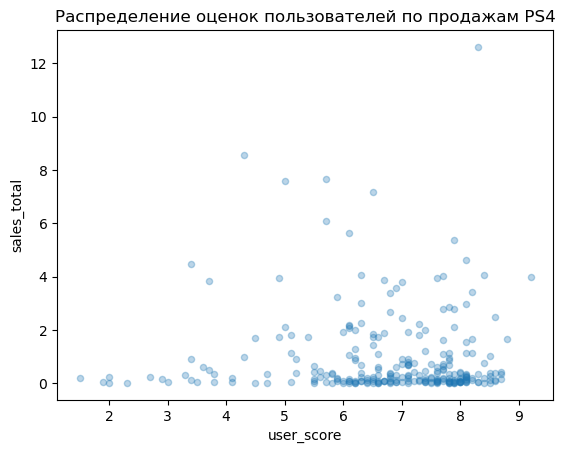

In [38]:
corr_ps4_user_score = df[(df['platform'] == 'PS4') & (df['user_score'] > 0)]
corr_ps4_user_score.plot(x='user_score', y='sales_total', kind='scatter', alpha=0.3, title='Распределение оценок пользователей по продажам PS4') 
print(f'Корреляция составляет:', corr_ps4_user_score['user_score'].corr(corr_ps4_user_score['sales_total']))

Корреляция составляет: -0.06892505319711206


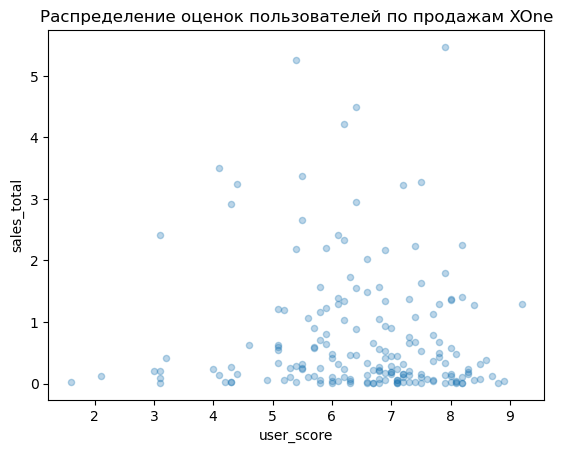

In [39]:
corr_xone_user_score = df[(df['platform'] == 'XOne') & (df['user_score'] > 0)]
corr_xone_user_score.plot(x='user_score', y='sales_total', kind='scatter', alpha=0.3, title='Распределение оценок пользователей по продажам XOne') 
print(f'Корреляция составляет:', corr_xone_user_score['user_score'].corr(corr_xone_user_score['sales_total']))

Корреляция составляет: 0.22480795212913182


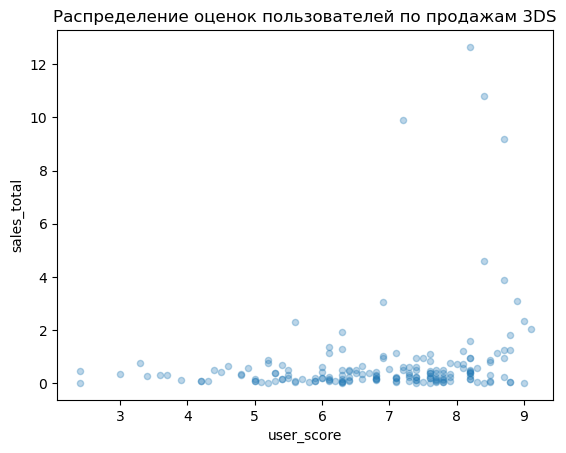

In [40]:
corr_3ds_user_score = df[(df['platform'] == '3DS') & (df['user_score'] > 0)]
corr_3ds_user_score.plot(x='user_score', y='sales_total', kind='scatter', alpha=0.3, title='Распределение оценок пользователей по продажам 3DS') 
print(f'Корреляция составляет:', corr_3ds_user_score['user_score'].corr(corr_3ds_user_score['sales_total']))

**Корреляция настолько слабая, что можно сделать вывод об отсутсвии взаимосвязи оценок пользователей к объему продаж.**

### Посмотрим на общее распределение игр по жанрам. 

Что можно сказать о самых прибыльных жанрах? 
Выделяются ли жанры с высокими и низкими продажами?

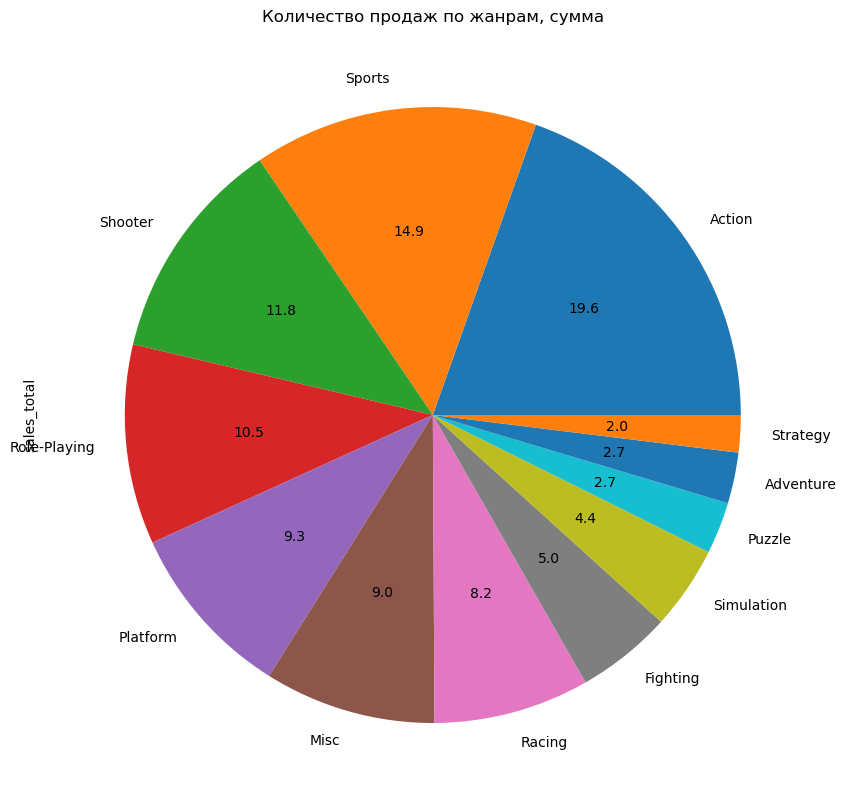

In [41]:
df.groupby('genre')['sales_total'].sum().sort_values(ascending = False).plot(kind = 'pie', figsize = (15,10), autopct="%.1f")
plt.title('Количество продаж по жанрам, сумма')
None

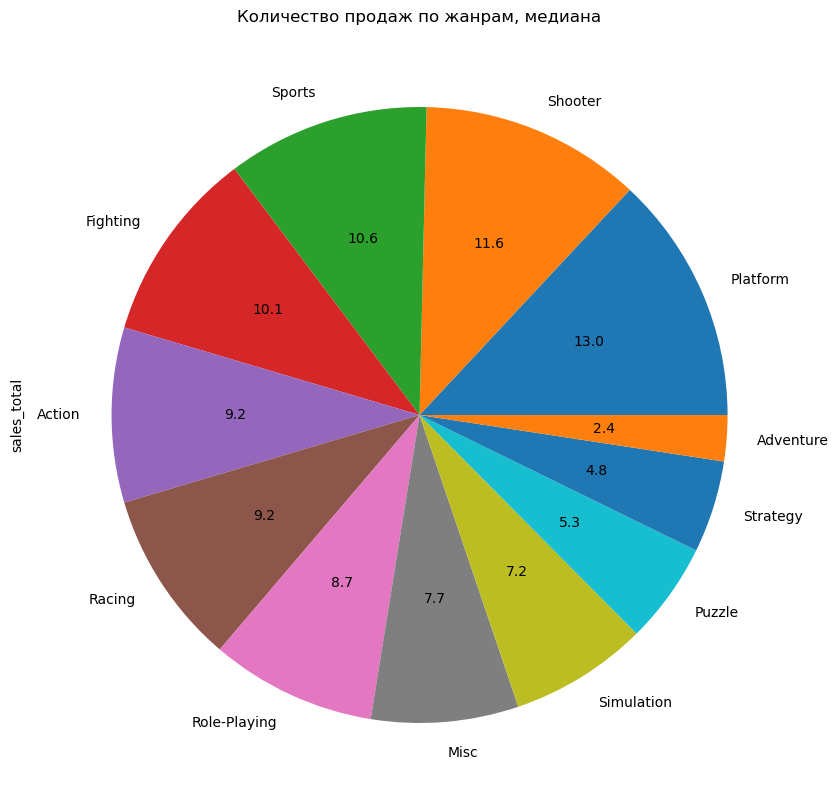

In [42]:
df.groupby('genre')['sales_total'].median().sort_values(ascending = False).plot(kind = 'pie', figsize = (15,10), autopct="%.1f")
plt.title('Количество продаж по жанрам, медиана')
None

Суммарно выделяется жанр Action, ему уступает почти на 5% жанр Sports. Puzzle, Adventure и Strategy на последних местах.

А вот с медианным значением все не так. Первое место заняли Платформеры, за ними следом Шутеры и категория спорт. Правда три последних места так и остались Puzzle, Adventure и Strategy.

Данную разницу в значениях можно объяснить большим множеством маленьких проектов.

**Общие выводы по исследовательскому анализу данных:**:
 - до 1993-1995 года выпускалось очень мало игр, в нулевых заметен резкий скачок, а к 2008-2009 был достигнут пик выпускаемой "продукции"
 - самые популярные игровые платформы за 36 лет это PlayStation 2, Xbox360, PlayStation 3, Wii, Nintendo DS и PlayStation
 - в среднем срок "жизни" платформы составляет 7-8 лет. Самый "долгожитель" это ПК - на него уже 26 лет выпускают игры
 - платформы с самыми лучшими продажами за последние 2 года, это Ps4 и XOne
 - самые перспективные платформы это PS4, XOne и 3DS. Также, нельзя забывать про ПК, так как он давно на рынке, и собрал свою "аудиторию"
 - пика продаж в год (в разрезе 2015-2016) достигла платформа PS4
 - в среднем, самая прибыльная платформа за 36 лет, это PS3
 - также, мы выяснили, что есть зависимость между рейтингом, выставляемым критиками, и количеством проданных копий, но отсутсвует связь между оценками пользователей и продажами игры.

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
 - Топ-5 самых популярных платформ
 - Топ-5 самых популярных жанров
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе

### Топ-5 самых популярных платформ по регионам

In [43]:
platform_sales_na = df.groupby('platform').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False)[:5]
platform_sales_eu = df.groupby('platform').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False)[:5]
platform_sales_jp = df.groupby('platform').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False)[:5]

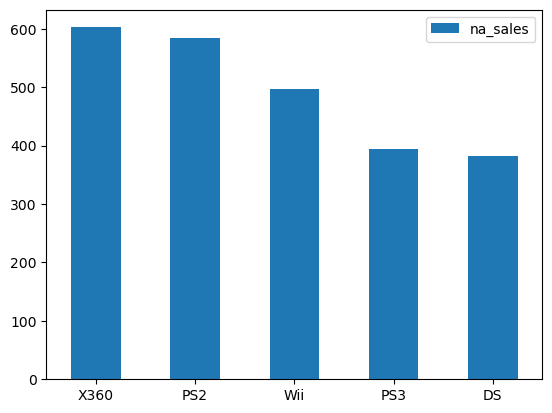

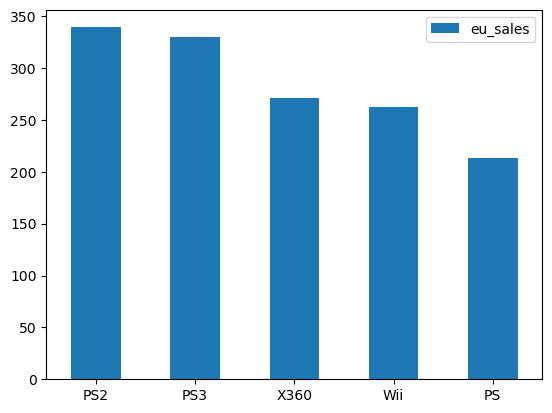

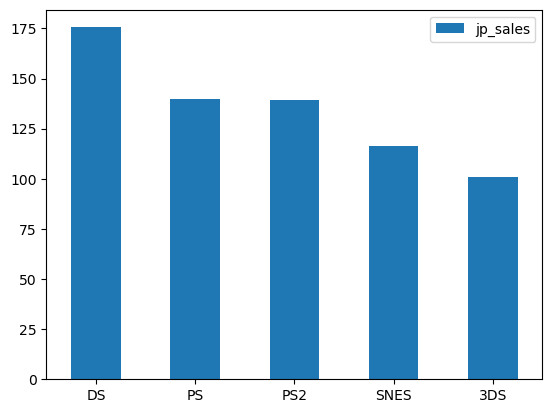

In [44]:
plot_na_platform = platform_sales_na.plot(kind='bar',rot=360)
plot_na_platform.set_xlabel('')
plot_eu_platform = platform_sales_eu.plot(kind='bar',rot=360)
plot_eu_platform.set_xlabel('')
plot_jp_platform = platform_sales_jp.plot(kind='bar',rot=360)
plot_jp_platform.set_xlabel('')
None

В Северной Америке самые популярные платформы за 36 лет:
 1. Xbox360
 2. Playstation2
 3. Wii
 4. Playstation3
 5. DS

В Европе ситуация схожа, тут у нас появляется первая версия Плейстейшн, и пропадает Nintendo DS:
 1. Playstation2 
 2. Playstation3
 3. Xbox360
 4. Wii
 5. Playstation

В Японии же все по-другому:
 1. DS 
 2. Playstation
 3. Playstation2
 4. SNES
 5. 3DS
 
Далее выделим топ-5 жанров по схожему принципу.

### Топ-5 самых популярных жанров по регионам

In [45]:
genre_sales_na = df.groupby('genre').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False)[:5]
genre_sales_eu = df.groupby('genre').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False)[:5]
genre_sales_jp = df.groupby('genre').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False)[:5]

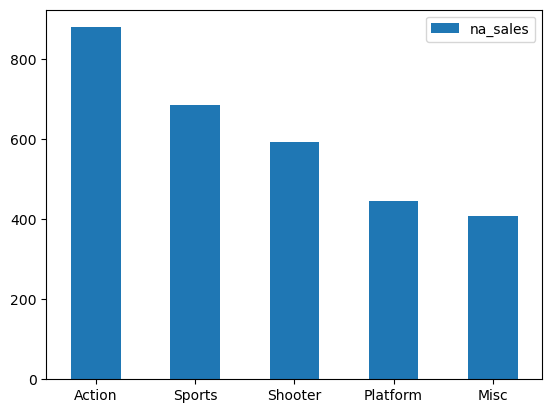

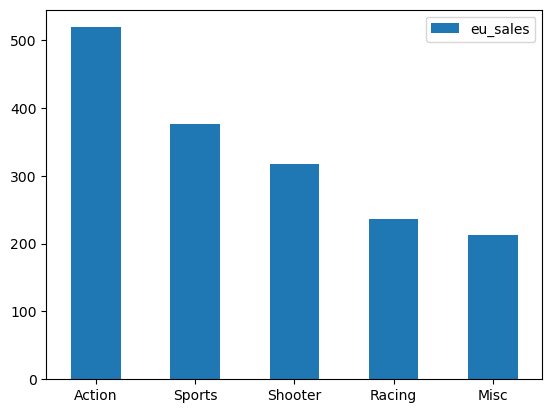

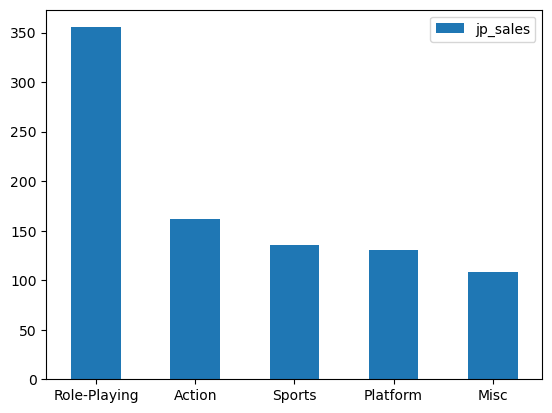

In [46]:
plot_na_genre = genre_sales_na.plot(kind='bar',rot=360)
plot_na_genre.set_xlabel('')
plot_eu_genre = genre_sales_eu.plot(kind='bar',rot=360)
plot_eu_genre.set_xlabel('')
plot_jp_genre = genre_sales_jp.plot(kind='bar',rot=360)
plot_jp_genre.set_xlabel('')
None

В Европе и Северной Америке вкусы очень схожи, отличается лишь 4 место, Платформеры против Гонок соответсвенно.

В Японии как обычно "другой мир". Шутеры отсутсвуют, первое место занимают РПГ.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Для начала опредилим какие рейтинги есть, и что они  обозначают.

In [47]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Рейтинги ESRB:
- E - everyone, рейтинг без возрастных ограничений
- M - mature 17+, от 17 лет и выше
- T - teen 13+, от 13 лет и выше
- E10+ - everyone 10+, для всех от 10 лет
- K-A - Kids to Adults, для всех
- AO - Adults Only 18+, только для взрослых
- EC - Early Childhood, для детей
- RP - Rating Pending, рейтинг не определен

Сначала, я хочу посмотреть на общее распределение рейтингов, какие впереди всех, какие в хвосте.

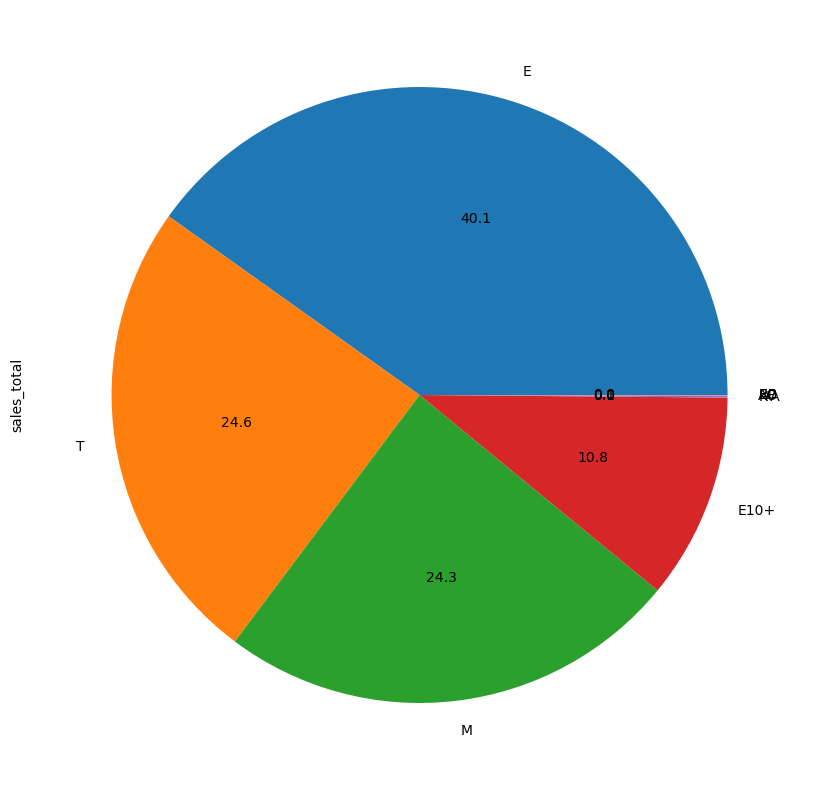

In [48]:
df.groupby('rating')['sales_total'].sum().sort_values(ascending = False).plot(kind = 'pie', figsize = (15,10), autopct="%.1f")
None

Самый частый рейтинг по всей выборке, это рейтинг для всех возрастов. Да и вообще, превалируют рейтинги для "молодежи".

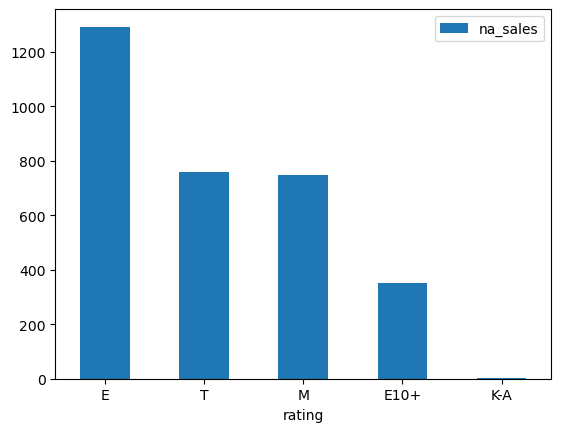

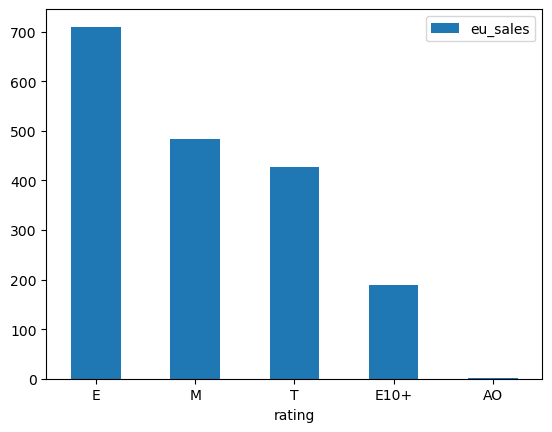

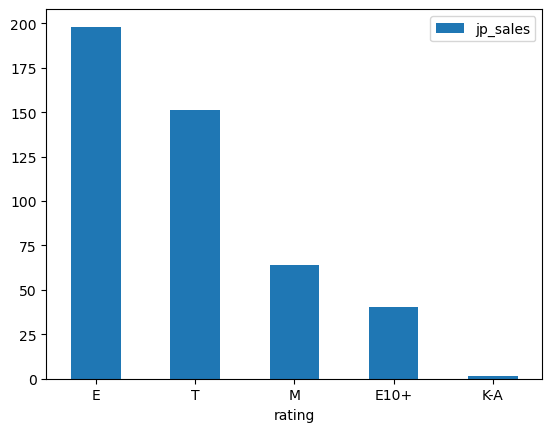

In [49]:
df.groupby('rating').agg({'na_sales': 'sum'}).sort_values(by='na_sales', ascending=False)[:5].plot(kind='bar',rot=360)
df.groupby('rating').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales', ascending=False)[:5].plot(kind='bar',rot=360)
df.groupby('rating').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales', ascending=False)[:5].plot(kind='bar',rot=360)
None

Во всех регионах топ рейтингов похож. 3 основных рейтинга здесь, это "Игры для всех", 17+ и 13+.

Единственная существенная разница в общих продажах игр, в Японии намного меньше продаж по всем рейтингам.

**Общие выводы по теме:** среднестатистический игрок в Северной Америке и Европе, это владелец Xbox либо Playstation, предпочитающий экшены с рейтингом игры для всех. В Японии же, это владелец Нинтендо ДС играющий в РПГ с рейтингом "без ограничений".

## Проверим гипотезы

**Гипотеза №1:**
 - **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**
 
Нулевая гипотеза - средние пользовательские рейтинги Xbox One и PC одинаковые

Альтернативная гипотеза - средние пользовательские рейтинги Xbox One и PC различаются

In [50]:
results = st.ttest_ind(df.query('platform == "XOne"')['user_score'].dropna(),
                       df.query('platform == "PC"')['user_score'].dropna(),
                       equal_var = False)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.0010304331506446052
Отвергаем нулевую гипотезу


Следовательно верным будет утверждение - средние пользовательские рейтинги Xbox One и PC различаются.

**Гипотеза №2:**
 - **Средние пользовательские рейтинги жанров Action и Sports разные**
 
Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports разные

Альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports одинаковы

In [51]:
results = st.ttest_ind(df.query('genre == "Action" & user_score > 0')['user_score'].dropna(),
                       df.query('genre == "Sports" & user_score > 0')['user_score'].dropna(),
                       equal_var = False)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.11483862442326365
Не получилось отвергнуть нулевую гипотезу


У нас не получилось отвергнуть нулевую гипотезу, следовательно средние пользовательские рейтинги жанров Action и Sports одинаковы

## Общий вывод

Мы провели большую работу по исследовательскому анализу данных о продажах игр за период 1980 -2016 годов.

Первым делом были изучены данные, и сделаны следующие выводы:
 - в столбцах с  оценкой критиков, оценкой пользователей и "рейтинг" наблюдается большое количество пропусков
 - столбец "Year_of_Release" необходимо перевести в тип int
 - столбец "User_Score" необходимо перевести в тип float, так же в данном столбце замечено значение "TBD" 
 - столбец с оценкой критиков приведем к типу int
 - аномальных значений не обнаружено
 - распределение данных нормальное
 
Далее была проведена предобработка данных. Добавлен столбец с суммарными продажами, изменены типы данных, пропуски заменены заглушками в столбцах с оценками пользователей и критиков. В столбце с именем и жанром остались по 2 пропуска, на эти данные можно не обращать внимания. В столбце с годом выпуска игры 269 пропусков, из общей выборки это лишь 1,6%.

Следующим шагом мы провели исследовательский анализ данных. 
До 1995 года выпускалось очень мало игр, в нулевых заметен резкий скачок, а к 2008 был достигнут пик выпускаемой "продукции". Самые популярные игровые платформы за 36 лет это PlayStation 2, Xbox360, PlayStation 3, Wii, Nintendo DS и PlayStation. В среднем срок "жизни" платформы составляет 7-8 лет. Самый "долгожитель" это ПК - на него уже 26 лет выпускают игры. Платформы с самыми лучшими продажами за последние 2 года, это Ps4 и XOne. Самые перспективные платформы это PS4, XOne и 3DS. Также, нельзя забывать про ПК, так как он давно на рынке, и собрал свою "аудиторию". Пика продаж в год (за период 2015-2016) достигла платформа PS4. Самая прибыльная платформа за 36 лет, это PS3. Также, мы выяснили, что есть зависимость между рейтингом, выставляемым критиками, и количеством проданных копий, но отсутсвует связь между оценками пользователей и продажами игры.

Среднестатистический игрок в Северной Америке и Европе, это владелец Xbox либо Playstation, предпочитающий экшены с рейтингом игры для всех. В Японии же, это владелец Нинтендо ДС играющий в РПГ с рейтингом "без ограничений".

Так же, были выдвинуты две гипотезы. Первая, о том, что средние пользовательские рейтинги Xbox One и PC одинаковые, и она не подтвердилась. Вторая - средние пользовательские рейтинги жанров Action и Sports разные. Вторая гипотеза подтвердилась.